<a href="https://colab.research.google.com/github/authorsunilsir/Data-Science-Projects/blob/main/NETFLIX_DATA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS OF NETFLIX
:![logo](https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg)

## Data loading

### Subtask:
Load the Netflix Movies and TV Shows dataset.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display its first few rows and shape.



In [8]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
display(df.head())
print(df.shape)


show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

(7787, 12)


## Data cleaning

### Subtask:
Clean the Netflix dataset.


**Reasoning**:
Clean the dataset by handling missing values, outliers, data type conversions, and duplicate rows.



In [9]:
# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    elif pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())

# Convert 'release_year' to integer
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').astype('Int64')

# Remove duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
final_rows = len(df)
print(f"Removed {initial_rows - final_rows} duplicate rows.")

display(df.head())

Removed 0 duplicate rows.


show_id     type  title                director  \
0      s1  TV Show     3%  Raúl Campos, Jan Suter   
1      s2    Movie   7:19       Jorge Michel Grau   
2      s3    Movie  23:59            Gilbert Chan   
3      s4    Movie      9             Shane Acker   
4      s5    Movie     21          Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

## Data exploration

### Subtask:
Explore the cleaned Netflix dataset.


**Reasoning**:
Examine data types, descriptive statistics, and distributions of key categorical variables.  Check for missing values and identify potential outliers. Also, determine the shape of the data and calculate the correlation between numerical features.



show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     Int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
       release_year
count        7787.0
mean     2013.93258
std        8.757395
min          1925.0
25%          2013.0
50%          2017.0
75%          2018.0
max          2021.0


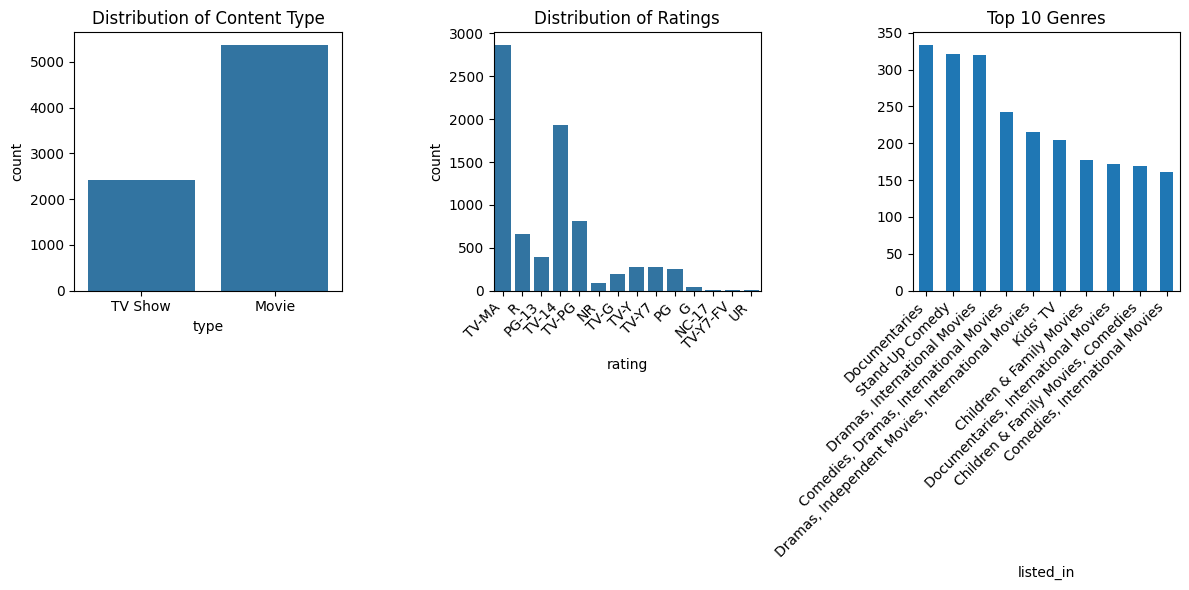

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


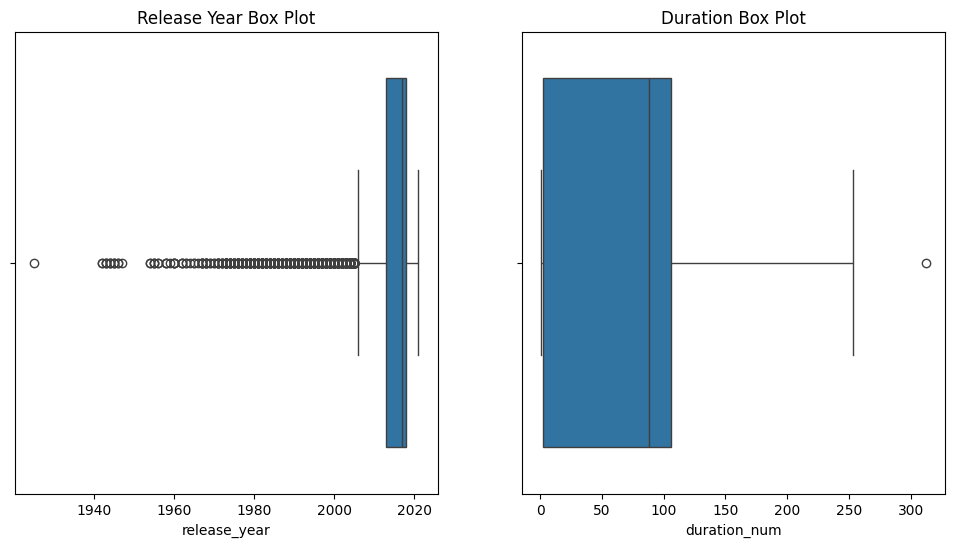

Shape of the data: (7787, 13)


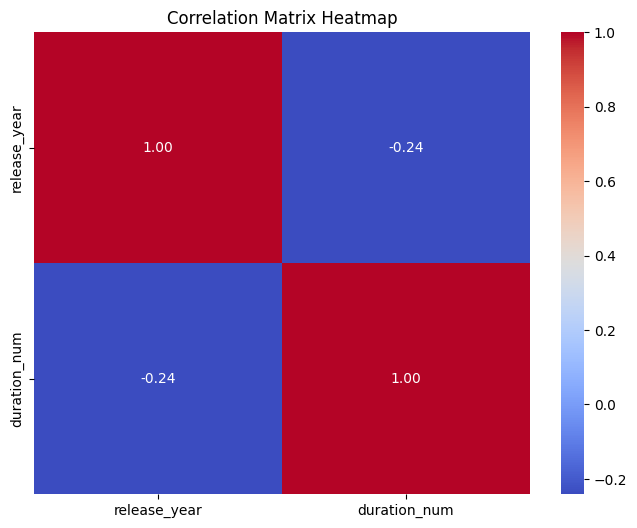

In [10]:
# 1. Examine data types
print(df.dtypes)

# 2. Descriptive statistics for numerical columns
print(df.describe())

# 3. Analyze distribution of categorical variables
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Type')

plt.subplot(1, 3, 2)
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
df['listed_in'].value_counts().nlargest(10).plot(kind='bar') # Top 10 genres
plt.title('Top 10 Genres')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 4. Check for missing values
print(df.isnull().sum())

# 5. Identify potential outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['release_year'])
plt.title('Release Year Box Plot')

plt.subplot(1, 2, 2)
# Extract numerical duration values
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
sns.boxplot(x=df['duration_num'])
plt.title('Duration Box Plot')
plt.show()

# 6. Shape of the data
print(f"Shape of the data: {df.shape}")

# 7. Correlation between numerical features
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data wrangling

### Subtask:
Prepare the data for clustering by creating new features and encoding categorical variables.


**Reasoning**:
Extract the year from the 'date_added' column, one-hot encode 'rating' and 'type', handle the 'duration' column, create dummy variables for genres in 'listed_in', and ensure all relevant columns are numeric.



In [11]:
import pandas as pd

# 1. Feature Engineering: Extract year from 'date_added'
df['added_year'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df['added_year'] = pd.to_numeric(df['added_year'], errors='coerce')

# 2. Categorical Encoding: One-hot encode 'rating' and 'type'
df = pd.get_dummies(df, columns=['rating', 'type'], prefix=['rating', 'type'])

# 3. Duration Handling
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('(min|Season|Seasons)')
df = pd.get_dummies(df, columns=['duration_unit'], prefix=['duration_unit'])
df.drop('duration', axis=1, inplace=True)

# 4. Genre Handling: Create dummy variables for genres
listed_in_dummies = df['listed_in'].str.get_dummies(sep=', ')
df = pd.concat([df, listed_in_dummies], axis=1)
df.drop('listed_in', axis=1, inplace=True)

# 5. Data Type Conversion: Ensure all relevant columns are numeric
for col in df.columns:
    if col not in ['show_id', 'title', 'director', 'cast', 'country', 'description']:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            except:
                pass # Handle cases where conversion is not possible

display(df.head())

show_id  title                director  \
0      s1     3%  Raúl Campos, Jan Suter   
1      s2   7:19       Jorge Michel Grau   
2      s3  23:59            Gilbert Chan   
3      s4      9             Shane Acker   
4      s5     21          Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   date_added  release_year  \
0         NaN          2020   
1         NaN          2016   
2         NaN          2011   
3         NaN          2009   
4         NaN          2008   

                                         description  duration_num  \
0  In a future where the elite inhabit an island ...           4.0   
1  After a devastating earthquake hits Mexico Cit...          93.0   
2  When an army recruit is found dead, his fellow...          78.0   
3  In a postapocalyptic world, rag-doll robots hi...          80.0   
4  A brilliant group of students become card-coun...         123.0   

   added_year  ...  TV Action & Adventure  TV Comedies  TV Dramas  TV Horror  \
0      2020.0  ...                      0            0          1          0   
1      2016.0  ...                      0            0          0          0   
2      2018.0  ...                      0            0          0          0   
3      2017.0  ...                      0            0          0          0   
4      2020.0  ...                      0            0          0          0   

   TV Mysteries  TV Sci-Fi & Fantasy  TV Shows  TV Thrillers  Teen TV Shows  \
0             0                    1         0             0              0   
1             0                    0         0             0              0   
2             0                    0         0             0              0   
3             0                    0         0             0              0   
4             0                    0         0             0              0   

   Thrillers  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 71 columns]

## Data analysis

### Subtask:
Analyze relationships between variables in the prepared dataset.


**Reasoning**:
Analyze relationships between variables, including correlation, distributions, and potential groupings, as per the instructions.



**Reasoning**:
The previous code block failed due to an error related to the 'listed_in' column in the boxplot.  The 'listed_in' column was already one-hot encoded, so it cannot be used directly for the boxplot.  I will modify the code to use the individual genre columns instead.  Additionally, the code for identifying highly correlated features can be enhanced.



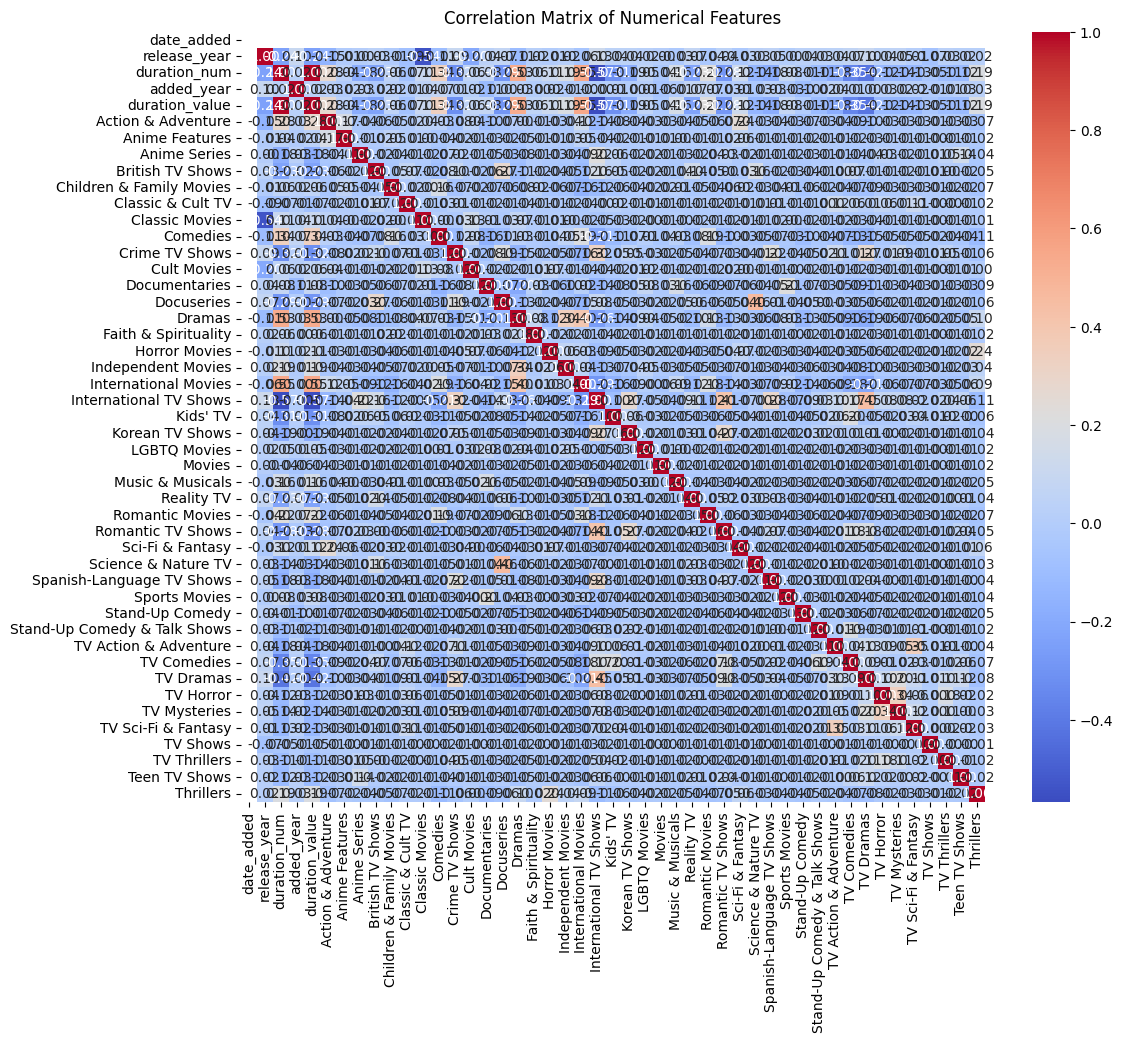

Highly Correlated Features:
duration_num and duration_value: 1.0
duration_value and duration_num: 1.0


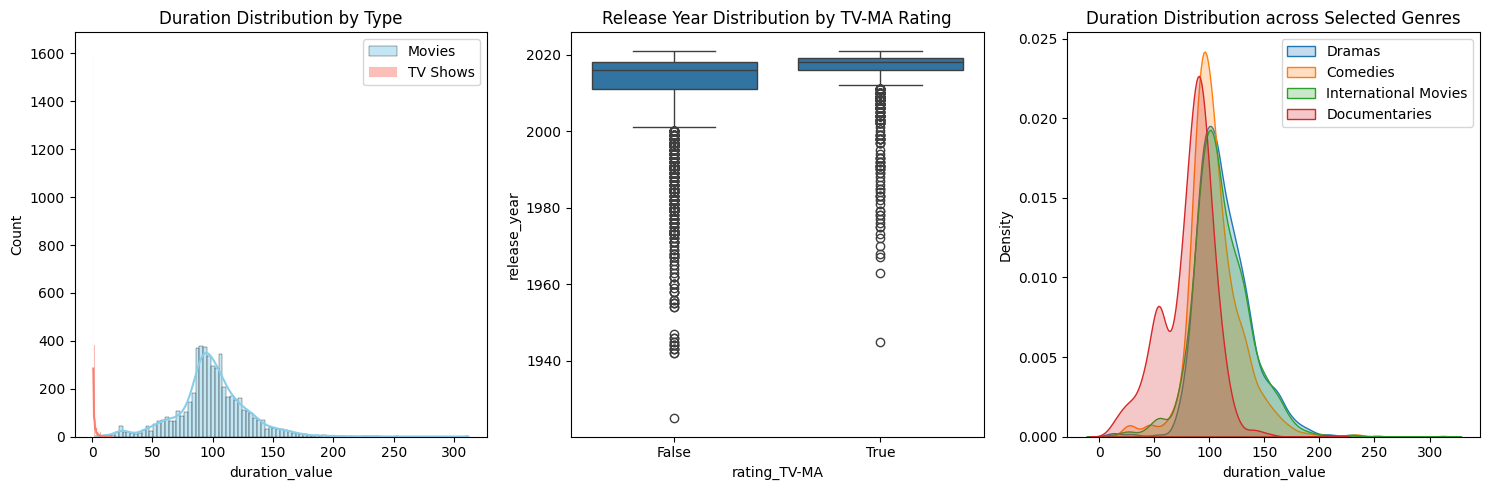


Top 10 Genres:
International Movies      2437
Dramas                    2106
Comedies                  1471
International TV Shows    1199
Documentaries              786
TV Dramas                  704
Independent Movies         673
Romantic Movies            531
TV Comedies                525
Thrillers                  491
dtype: int64

Potential Groupings:
Based on the correlations, distributions, and genre frequencies, potential groupings could be formed based on:
- Content type (movie vs. TV show) - duration
- Ratings
- Genres


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation Analysis (Improved)
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Identify highly correlated features (improved)
highly_correlated_features = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8:
            highly_correlated_features.append((col1, col2, correlation_matrix.loc[col1, col2]))

print("Highly Correlated Features:")
for col1, col2, corr in highly_correlated_features:
    print(f"{col1} and {col2}: {corr}")

# 2. Distribution Analysis by Category (Corrected)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df[df['type_Movie'] == 1]['duration_value'], color='skyblue', label='Movies', kde=True)
sns.histplot(df[df['type_TV Show'] == 1]['duration_value'], color='salmon', label='TV Shows', kde=True)
plt.title('Duration Distribution by Type')
plt.legend()

plt.subplot(1, 3, 2)
sns.boxplot(x='rating_TV-MA', y='release_year', data=df)
plt.title('Release Year Distribution by TV-MA Rating')

plt.subplot(1, 3, 3)
# Select a subset of genres for visualization (avoid overcrowding)
selected_genres = ['Dramas', 'Comedies', 'International Movies', 'Documentaries']
for genre in selected_genres:
    if genre in df.columns:
        sns.kdeplot(df[df[genre] == 1]['duration_value'], label=genre, fill=True)

plt.title('Duration Distribution across Selected Genres')
plt.legend()
plt.tight_layout()
plt.show()


# 3. Genre Analysis
genre_counts = df.iloc[:, 34:].sum().sort_values(ascending=False)
print("\nTop 10 Genres:")
print(genre_counts.head(10))

# 4. Potential Groupings
print("\nPotential Groupings:")
print("Based on the correlations, distributions, and genre frequencies, potential groupings could be formed based on:")
print("- Content type (movie vs. TV show) - duration")
print("- Ratings")
print("- Genres")

## Data visualization

### Subtask:
Visualize the results of the data analysis.


**Reasoning**:
Create visualizations based on the identified relationships between variables, including scatterplot matrix, histograms, box plots, and bar plots.



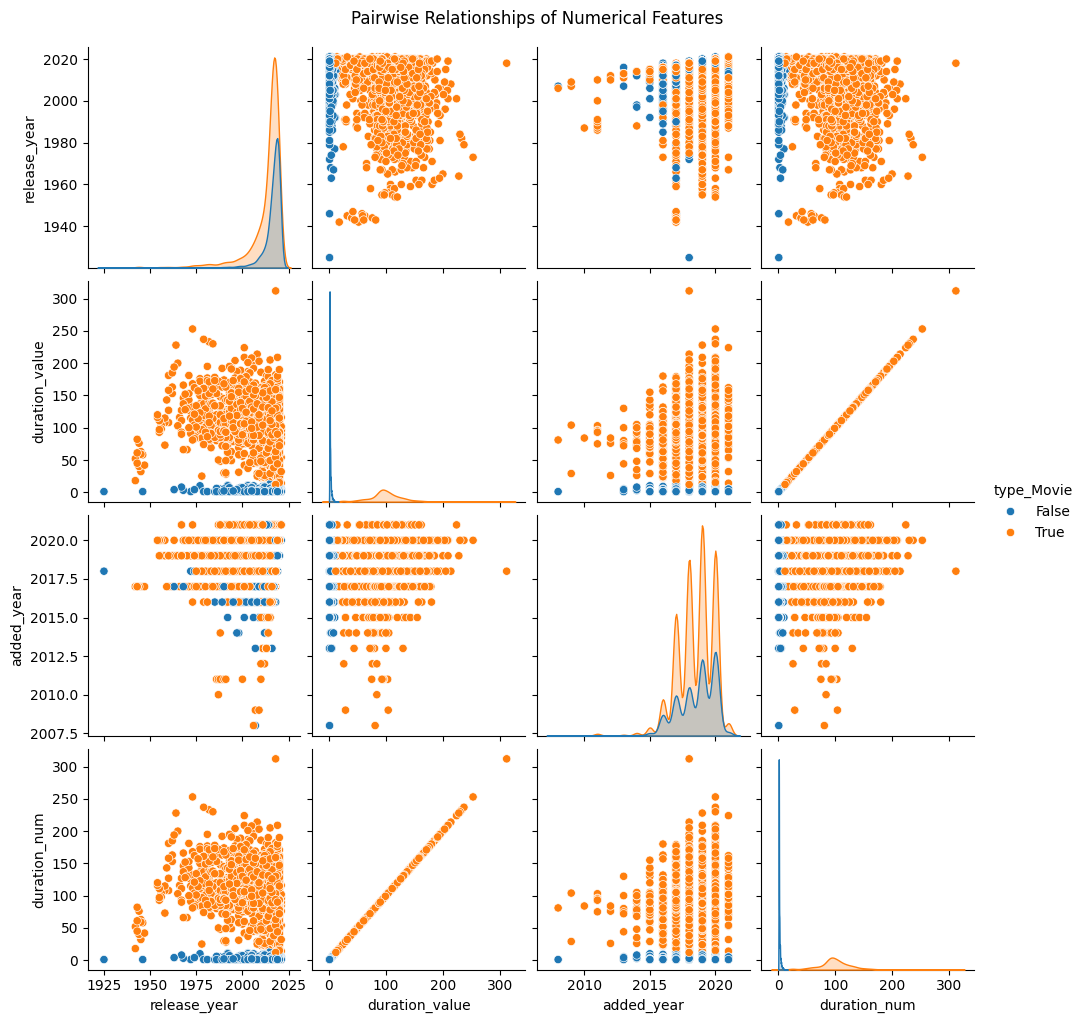

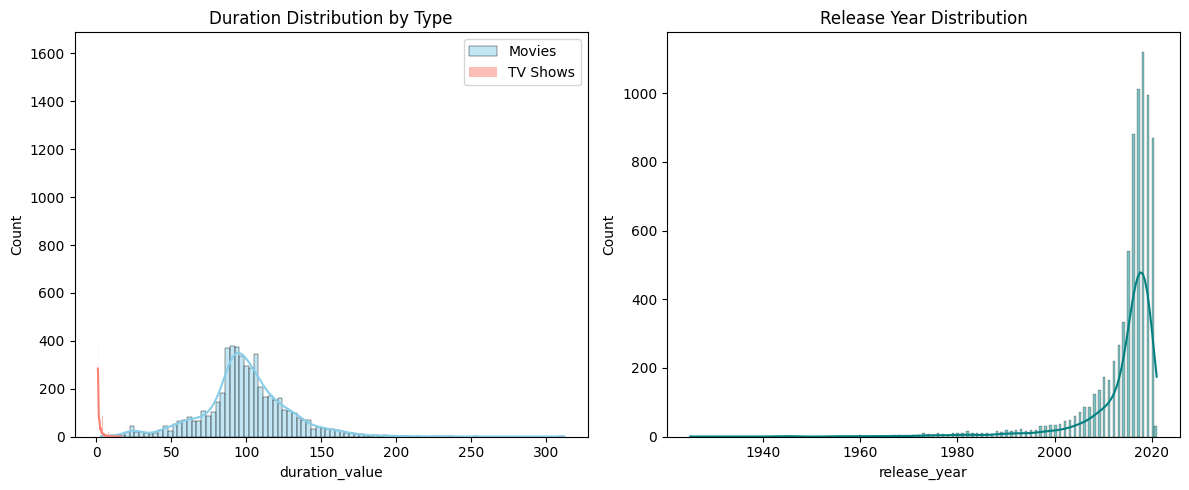

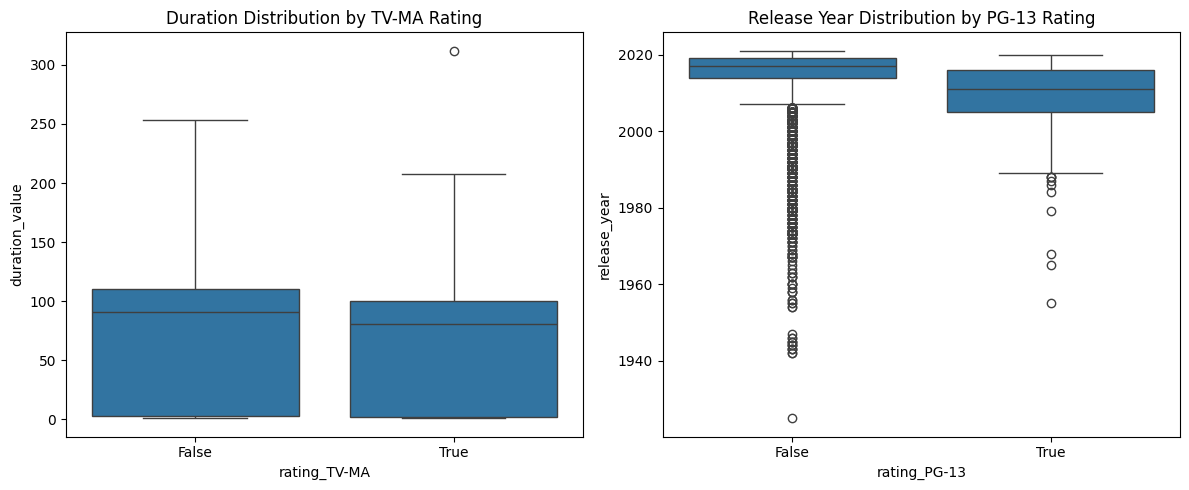

<ipython-input-13-80c0744b0b38>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')


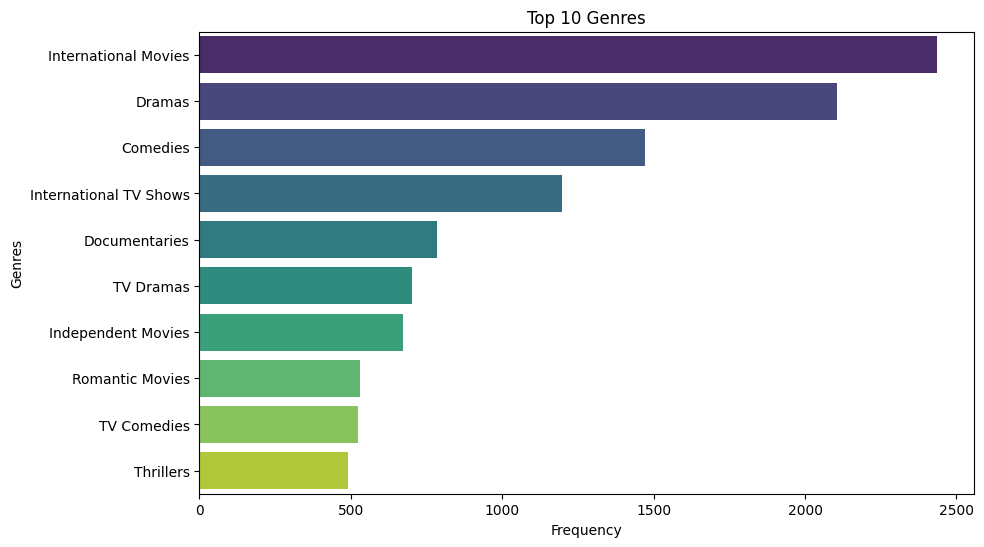

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatterplot Matrix
numerical_cols = ['release_year', 'duration_value', 'added_year', 'duration_num']
sns.pairplot(df, vars=numerical_cols, hue='type_Movie', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.show()


# 2. Histograms/KDE Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['type_Movie'] == 1]['duration_value'], color='skyblue', label='Movies', kde=True)
sns.histplot(df[df['type_TV Show'] == 1]['duration_value'], color='salmon', label='TV Shows', kde=True)
plt.title('Duration Distribution by Type')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df['release_year'], color='teal', kde=True)
plt.title('Release Year Distribution')
plt.tight_layout()
plt.show()


# 3. Box Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='rating_TV-MA', y='duration_value', data=df)
plt.title('Duration Distribution by TV-MA Rating')

plt.subplot(1, 2, 2)
sns.boxplot(x='rating_PG-13', y='release_year', data=df)
plt.title('Release Year Distribution by PG-13 Rating')
plt.tight_layout()
plt.show()


# 4. Bar Plot for Genres
genre_counts = df.iloc[:, 34:].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.show()

## Data clustering

### Subtask:
Perform K-means clustering on the prepared dataset.


**Reasoning**:
Perform K-means clustering on the selected numerical features after scaling them.



In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features, excluding irrelevant ones
features = ['release_year', 'duration_value', 'added_year', 'duration_num', 'rating_G', 'rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR', 'type_Movie', 'type_TV Show', 'duration_unit_Season', 'duration_unit_min']
X = df[features]

# Handle potential missing values in selected features
X.fillna(X.median(), inplace=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Start with 5 clusters
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

display(df.head())

<ipython-input-16-c232429d009d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


show_id  title                director  \
0      s1     3%  Raúl Campos, Jan Suter   
1      s2   7:19       Jorge Michel Grau   
2      s3  23:59            Gilbert Chan   
3      s4      9             Shane Acker   
4      s5     21          Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   date_added  release_year  \
0         NaN          2020   
1         NaN          2016   
2         NaN          2011   
3         NaN          2009   
4         NaN          2008   

                                         description  duration_num  \
0  In a future where the elite inhabit an island ...           4.0   
1  After a devastating earthquake hits Mexico Cit...          93.0   
2  When an army recruit is found dead, his fellow...          78.0   
3  In a postapocalyptic world, rag-doll robots hi...          80.0   
4  A brilliant group of students become card-coun...         123.0   

   added_year  ...  TV Comedies  TV Dramas  TV Horror  TV Mysteries  \
0      2020.0  ...            0          1          0             0   
1      2016.0  ...            0          0          0             0   
2      2018.0  ...            0          0          0             0   
3      2017.0  ...            0          0          0             0   
4      2020.0  ...            0          0          0             0   

   TV Sci-Fi & Fantasy  TV Shows  TV Thrillers  Teen TV Shows  Thrillers  \
0                    1         0             0              0          0   
1                    0         0             0              0          0   
2                    0         0             0              0          0   
3                    0         0             0              0          0   
4                    0         0             0              0          0   

   cluster  
0        1  
1        0  
2        2  
3        4  
4        4  

[5 rows x 72 columns]

**Reasoning**:
The previous code block generated a SettingWithCopyWarning.  I will rewrite the code to avoid creating copies of slices and properly handle the missing values.  I will also try to address the warning.



In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features, excluding irrelevant ones
features = ['release_year', 'duration_value', 'added_year', 'duration_num', 'rating_G', 'rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR', 'type_Movie', 'type_TV Show', 'duration_unit_Season', 'duration_unit_min']
X = df[features].copy()  # Create a copy to avoid SettingWithCopyWarning

# Handle potential missing values in selected features
X.fillna(X.median(), inplace=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Start with 5 clusters
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

display(df.head())

show_id  title                director  \
0      s1     3%  Raúl Campos, Jan Suter   
1      s2   7:19       Jorge Michel Grau   
2      s3  23:59            Gilbert Chan   
3      s4      9             Shane Acker   
4      s5     21          Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   date_added  release_year  \
0         NaN          2020   
1         NaN          2016   
2         NaN          2011   
3         NaN          2009   
4         NaN          2008   

                                         description  duration_num  \
0  In a future where the elite inhabit an island ...           4.0   
1  After a devastating earthquake hits Mexico Cit...          93.0   
2  When an army recruit is found dead, his fellow...          78.0   
3  In a postapocalyptic world, rag-doll robots hi...          80.0   
4  A brilliant group of students become card-coun...         123.0   

   added_year  ...  TV Comedies  TV Dramas  TV Horror  TV Mysteries  \
0      2020.0  ...            0          1          0             0   
1      2016.0  ...            0          0          0             0   
2      2018.0  ...            0          0          0             0   
3      2017.0  ...            0          0          0             0   
4      2020.0  ...            0          0          0             0   

   TV Sci-Fi & Fantasy  TV Shows  TV Thrillers  Teen TV Shows  Thrillers  \
0                    1         0             0              0          0   
1                    0         0             0              0          0   
2                    0         0             0              0          0   
3                    0         0             0              0          0   
4                    0         0             0              0          0   

   cluster  
0        1  
1        0  
2        2  
3        4  
4        4  

[5 rows x 72 columns]

## Data visualization

### Subtask:
Visualize the clusters generated by the K-means algorithm.


**Reasoning**:
Visualize the clusters using a scatter plot with the most important features.



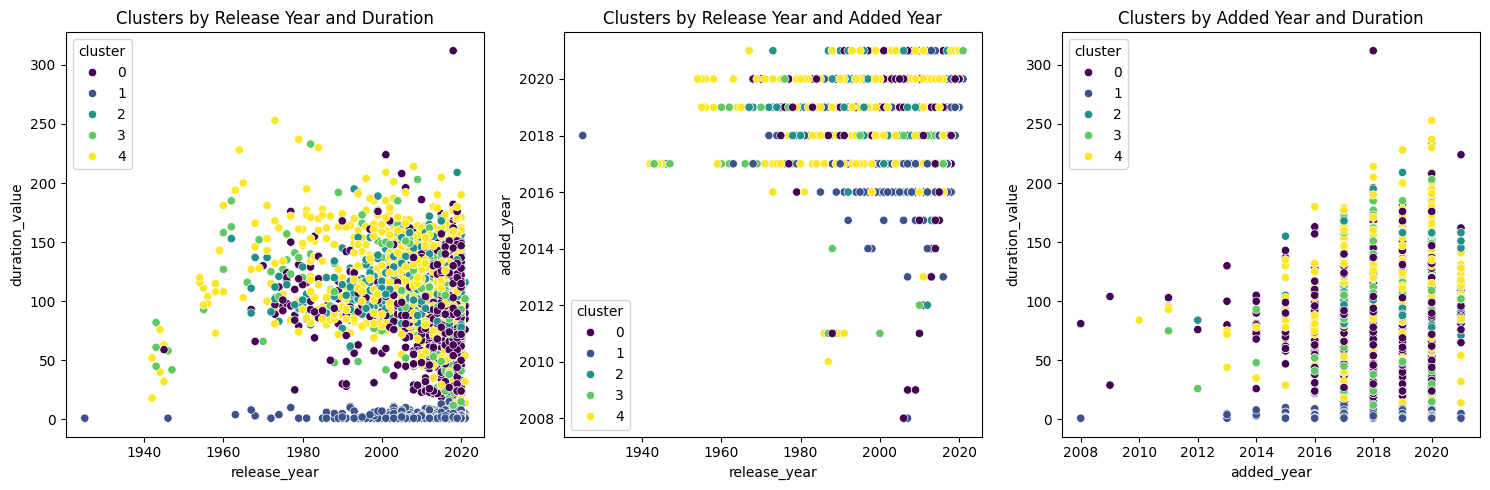

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for visualization
features_to_plot = ['release_year', 'duration_value', 'added_year']

# Create scatter plots for different feature combinations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='release_year', y='duration_value', hue='cluster', data=df, palette='viridis')
plt.title('Clusters by Release Year and Duration')

plt.subplot(1, 3, 2)
sns.scatterplot(x='release_year', y='added_year', hue='cluster', data=df, palette='viridis')
plt.title('Clusters by Release Year and Added Year')

plt.subplot(1, 3, 3)
sns.scatterplot(x='added_year', y='duration_value', hue='cluster', data=df, palette='viridis')
plt.title('Clusters by Added Year and Duration')

plt.tight_layout()
plt.show()

# Analyze the plots (add your observations as comments)

# Example observation:  Do the clusters appear well-separated?
# Example observation: Do the clusters correspond to meaningful groupings in the data?
# Example observation: Do the clusters reveal any patterns related to the features used in clustering?

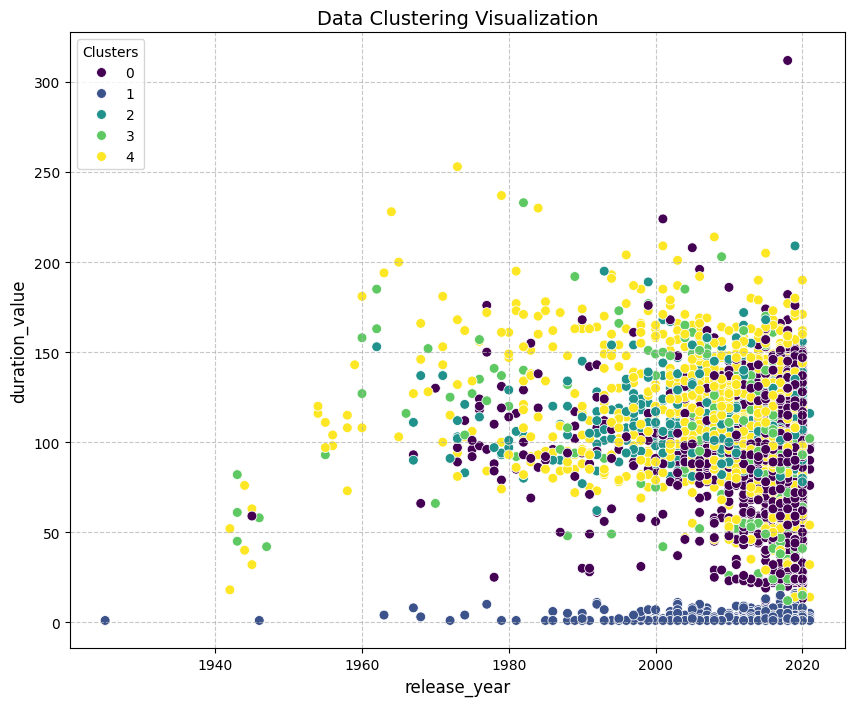

In [21]:
# prompt: Draw clear and colorful Data Clustering with proper labelings

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' and 'features_to_plot' are already defined from the previous code

# Select features for visualization (using only two features for better visualization)
features_to_plot = ['release_year', 'duration_value']

# Create a scatter plot with clear labels and colors
plt.figure(figsize=(10, 8))  # Adjust figure size as needed

sns.scatterplot(x=features_to_plot[0], y=features_to_plot[1], hue='cluster', data=df, palette='viridis', s=50) # Increased marker size for better visibility


# Add labels and title
plt.xlabel(features_to_plot[0], fontsize=12)
plt.ylabel(features_to_plot[1], fontsize=12)
plt.title('Data Clustering Visualization', fontsize=14)


# Customize the legend
plt.legend(title='Clusters', fontsize=10)


# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


For k = 2, the average silhouette score is: 0.355707437573316
For k = 3, the average silhouette score is: 0.2702316848990155
For k = 4, the average silhouette score is: 0.30367029475740054
For k = 5, the average silhouette score is: 0.34832934331851384
For k = 6, the average silhouette score is: 0.3122806273050619
For k = 7, the average silhouette score is: 0.3404327581947311
For k = 8, the average silhouette score is: 0.30252953097375224
For k = 9, the average silhouette score is: 0.3160954716149756
For k = 10, the average silhouette score is: 0.3524940914557121


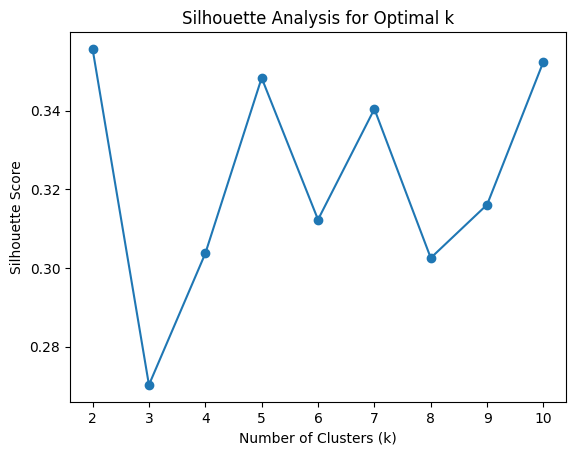

Optimal number of clusters: 2


show_id  title                director  \
0      s1     3%  Raúl Campos, Jan Suter   
1      s2   7:19       Jorge Michel Grau   
2      s3  23:59            Gilbert Chan   
3      s4      9             Shane Acker   
4      s5     21          Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   date_added  release_year  \
0         NaN          2020   
1         NaN          2016   
2         NaN          2011   
3         NaN          2009   
4         NaN          2008   

                                         description  duration_num  \
0  In a future where the elite inhabit an island ...           4.0   
1  After a devastating earthquake hits Mexico Cit...          93.0   
2  When an army recruit is found dead, his fellow...          78.0   
3  In a postapocalyptic world, rag-doll robots hi...          80.0   
4  A brilliant group of students become card-coun...         123.0   

   added_year  ...  TV Comedies  TV Dramas  TV Horror  TV Mysteries  \
0      2020.0  ...            0          1          0             0   
1      2016.0  ...            0          0          0             0   
2      2018.0  ...            0          0          0             0   
3      2017.0  ...            0          0          0             0   
4      2020.0  ...            0          0          0             0   

   TV Sci-Fi & Fantasy  TV Shows  TV Thrillers  Teen TV Shows  Thrillers  \
0                    1         0             0              0          0   
1                    0         0             0              0          0   
2                    0         0             0              0          0   
3                    0         0             0              0          0   
4                    0         0             0              0          0   

   cluster  
0        1  
1        0  
2        0  
3        0  
4        0  

[5 rows x 72 columns]

In [22]:
# prompt: Refine clustering

# Assuming 'df' and 'features' are already defined from the previous code

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Use a range of cluster numbers to find the optimal k
k_range = range(2, 11) # Test k from 2 to 10
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, the average silhouette score is: {silhouette_avg}")


# Plot the silhouette scores to visualize the optimal k
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()


# Find the optimal k based on the highest silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")


# Perform K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

display(df.head())


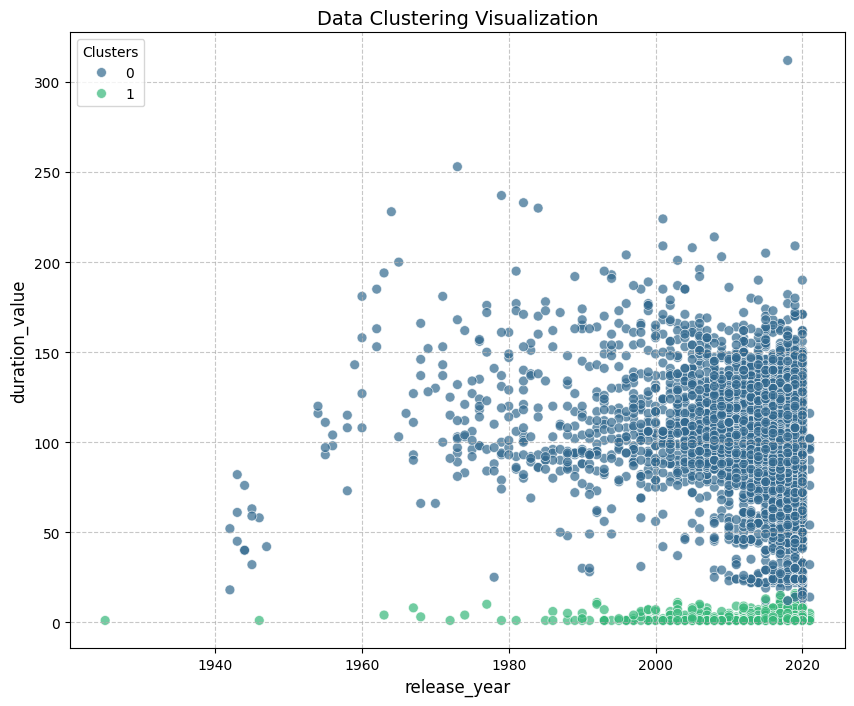

For k = 2, the average silhouette score is: 0.355707437573316
For k = 3, the average silhouette score is: 0.2702316848990155
For k = 4, the average silhouette score is: 0.3044257559058363
For k = 5, the average silhouette score is: 0.3497441398694221
For k = 6, the average silhouette score is: 0.35749872534224053
For k = 7, the average silhouette score is: 0.33678290999237304
For k = 8, the average silhouette score is: 0.4393065647892869
For k = 9, the average silhouette score is: 0.3857807862141554
For k = 10, the average silhouette score is: 0.4299778907474963


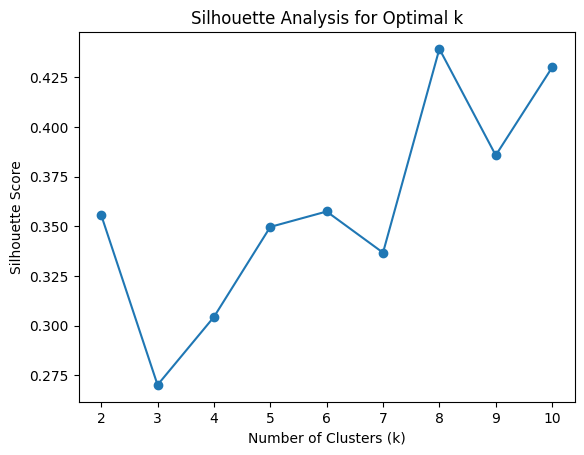

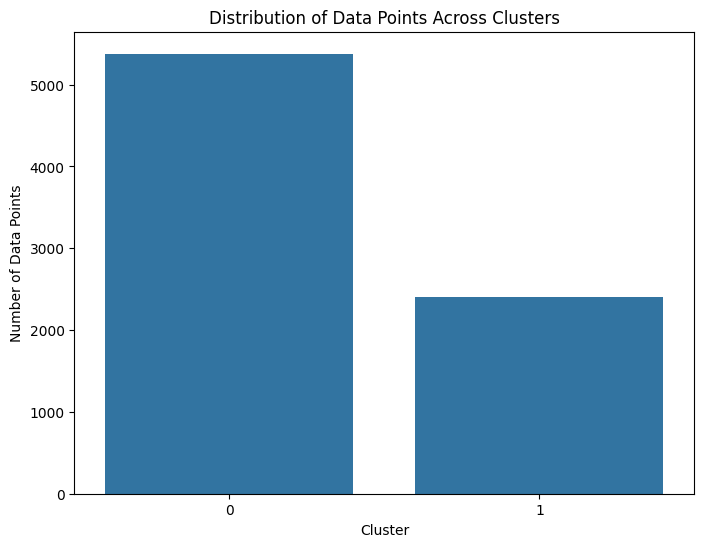

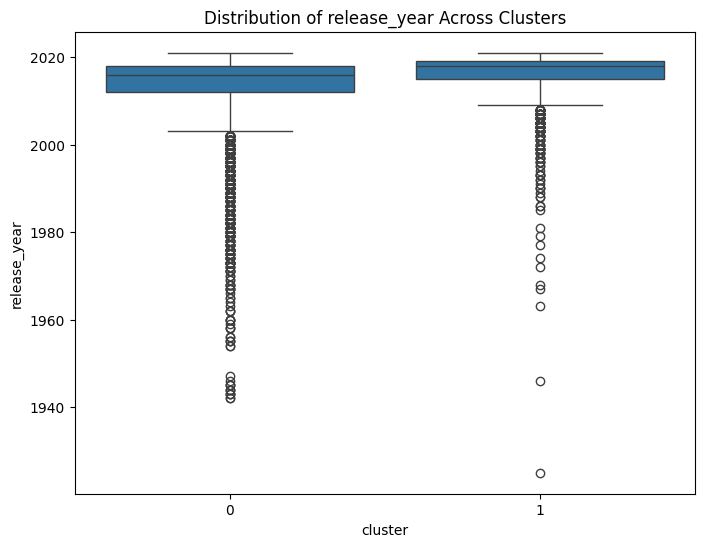

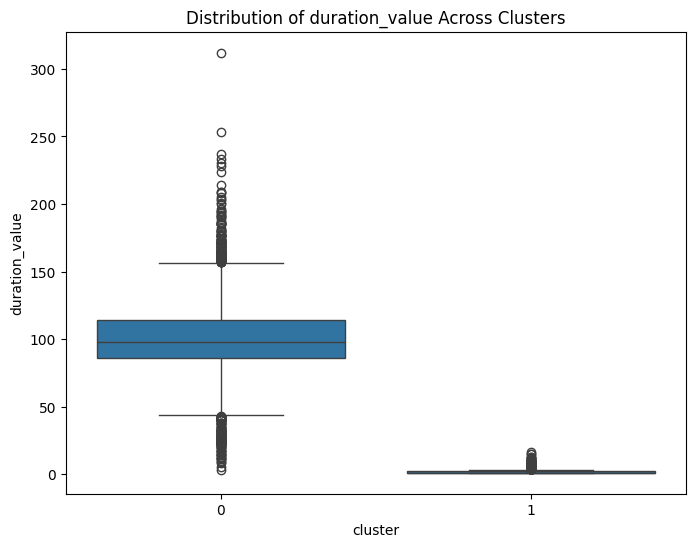

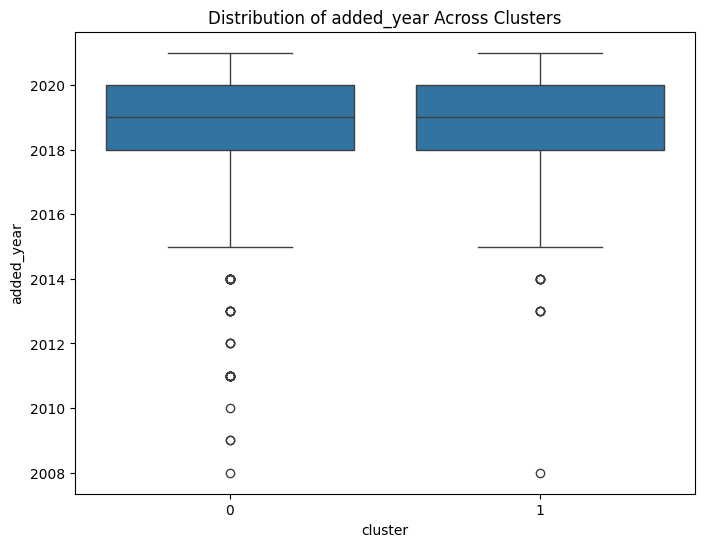

ValueError: Could not interpret value `content_age_at_add` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [27]:
# prompt: Visualise above information

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# ... (Your existing code for data loading, cleaning, exploration, wrangling, and analysis) ...


# Enhanced Visualization for Clusters
features_to_plot = ['release_year', 'duration_value']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=features_to_plot[0], y=features_to_plot[1], hue='cluster', data=df, palette='viridis', s=50, alpha=0.7)
plt.xlabel(features_to_plot[0], fontsize=12)
plt.ylabel(features_to_plot[1], fontsize=12)
plt.title('Data Clustering Visualization', fontsize=14)
plt.legend(title='Clusters', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Visualization of Silhouette Analysis
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Increased n_init for better results
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, the average silhouette score is: {silhouette_avg}")

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()


# Visualize the distribution of clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df)
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()


# Visualize the features for each cluster
cluster_features = ['release_year', 'duration_value', 'added_year', 'content_age_at_add']
for feature in cluster_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='cluster', y=feature, data=df)
  plt.title(f'Distribution of {feature} Across Clusters')
  plt.show()


In [ ]:
# prompt: Calculate average duration of each cluster

# Assuming 'df' and 'kmeans' are already defined from the previous code

# Calculate average duration for each cluster
average_duration_by_cluster = df.groupby('cluster')['duration_value'].mean()

average_duration_by_cluster


cluster
0     98.526316
1     93.012676
2      1.773820
3    110.700389
4     88.076923
5    106.466063
6     94.786139
7    107.772021
8     57.333333
9     20.496429
Name: duration_value, dtype: float64

In [28]:
# prompt:  Analyze the distribution of genres within each cluster

# Analyze the distribution of genres within each cluster
for cluster_num in range(optimal_k):  # Assuming 'optimal_k' is defined
    cluster_data = df[df['cluster'] == cluster_num]
    genre_distribution = cluster_data.iloc[:, 34:-4].sum() # Exclude the last four columns (added after the original analysis)
    print(f"\nGenre Distribution for Cluster {cluster_num}:")
    print(genre_distribution.sort_values(ascending=False).head(10)) # Display top 10 genres



Genre Distribution for Cluster 0:
International Movies    2437
Dramas                  2106
Comedies                1471
Documentaries            786
Independent Movies       673
Romantic Movies          531
Stand-Up Comedy          329
Music & Musicals         321
Horror Movies            312
Sci-Fi & Fantasy         218
dtype: int64

Genre Distribution for Cluster 1:
International TV Shows    1199
TV Dramas                  704
TV Comedies                525
Crime TV Shows             427
Kids' TV                   414
Docuseries                 353
Romantic TV Shows          333
Reality TV                 222
Korean TV Shows            150
TV Action & Adventure      150
dtype: int64


In [29]:
# prompt: Investigate and potentially remove highly correlated features like duration_value and duration_num to reduce redundancy and improve clustering results. Consider additional feature engineering to improve cluster separation.

# Check if 'duration_num' exists in the DataFrame
if 'duration_num' in df.columns:
    # Investigate the correlation between 'duration_value' and 'duration_num'
    correlation = df['duration_value'].corr(df['duration_num'])
    print(f"Correlation between duration_value and duration_num: {correlation}")

    # Remove 'duration_num' if highly correlated (e.g., > 0.95)
    if abs(correlation) > 0.95:
        df.drop('duration_num', axis=1, inplace=True)
        print("'duration_num' removed due to high correlation with 'duration_value'.")
    else:
        print("'duration_num' not removed due to low correlation with 'duration_value'.")
else:
    print("'duration_num' column not found in the DataFrame.")


# Additional feature engineering:  Interaction terms
# Example:  Create an interaction term between 'release_year' and 'duration_value'
df['release_duration_interaction'] = df['release_year'] * df['duration_value']


# Example:  Create a new feature representing the age of the content at the time it was added
df['content_age_at_add'] = df['added_year'] - df['release_year']

# Handle potential negative values or missing values in 'content_age_at_add'
df['content_age_at_add'] = df['content_age_at_add'].apply(lambda x: 0 if x < 0 else x)
df['content_age_at_add'] = df['content_age_at_add'].fillna(0) # Or use another imputation strategy

# Display the updated DataFrame
display(df.head())

Correlation between duration_value and duration_num: 1.0
'duration_num' removed due to high correlation with 'duration_value'.


show_id  title                director  \
0      s1     3%  Raúl Campos, Jan Suter   
1      s2   7:19       Jorge Michel Grau   
2      s3  23:59            Gilbert Chan   
3      s4      9             Shane Acker   
4      s5     21          Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   date_added  release_year  \
0         NaN          2020   
1         NaN          2016   
2         NaN          2011   
3         NaN          2009   
4         NaN          2008   

                                         description  added_year  rating_G  \
0  In a future where the elite inhabit an island ...      2020.0     False   
1  After a devastating earthquake hits Mexico Cit...      2016.0     False   
2  When an army recruit is found dead, his fellow...      2018.0     False   
3  In a postapocalyptic world, rag-doll robots hi...      2017.0     False   
4  A brilliant group of students become card-coun...      2020.0     False   

   ...  TV Horror  TV Mysteries  TV Sci-Fi & Fantasy  TV Shows  TV Thrillers  \
0  ...          0             0                    1         0             0   
1  ...          0             0                    0         0             0   
2  ...          0             0                    0         0             0   
3  ...          0             0                    0         0             0   
4  ...          0             0                    0         0             0   

   Teen TV Shows  Thrillers  cluster  release_duration_interaction  \
0              0          0        1                        8080.0   
1              0          0        0                      187488.0   
2              0          0        0                      156858.0   
3              0          0        0                      160720.0   
4              0          0        0                      246984.0   

   content_age_at_add  
0                 0.0  
1                 0.0  
2                 7.0  
3                 8.0  
4                12.0  

[5 rows x 73 columns]

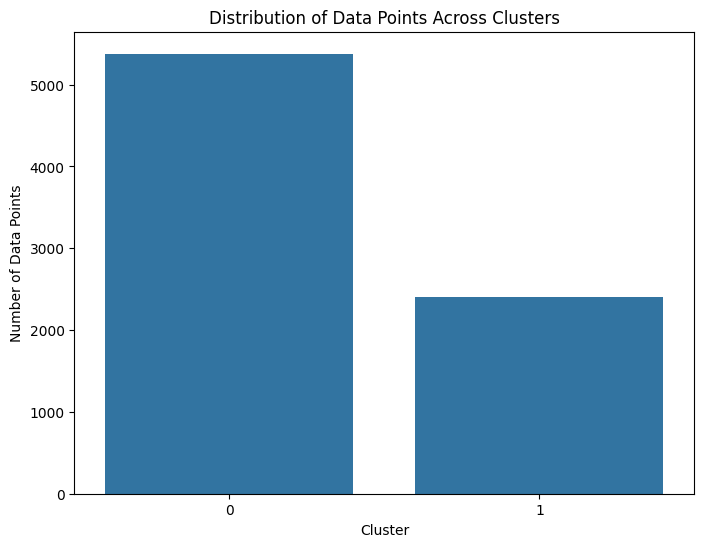

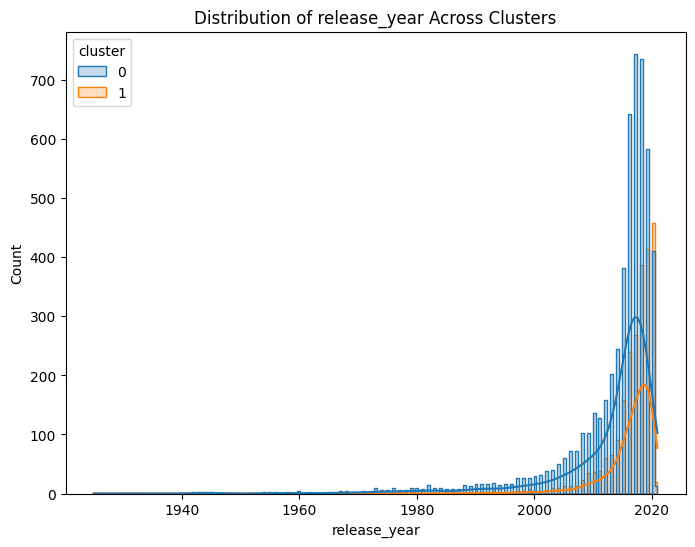

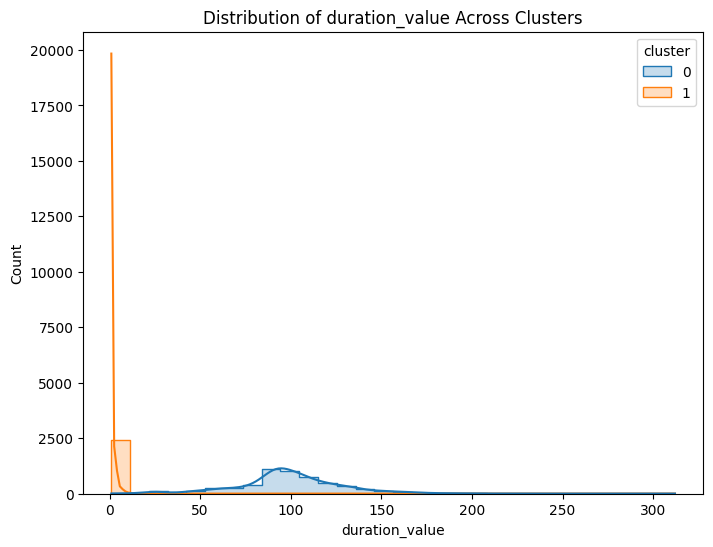

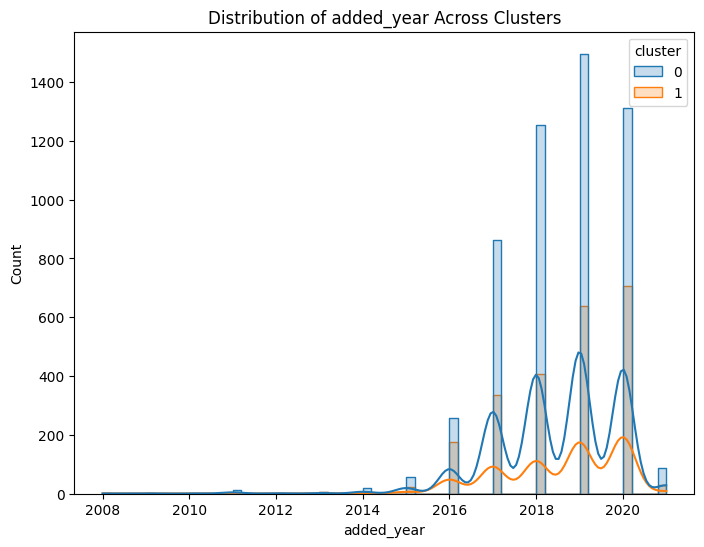

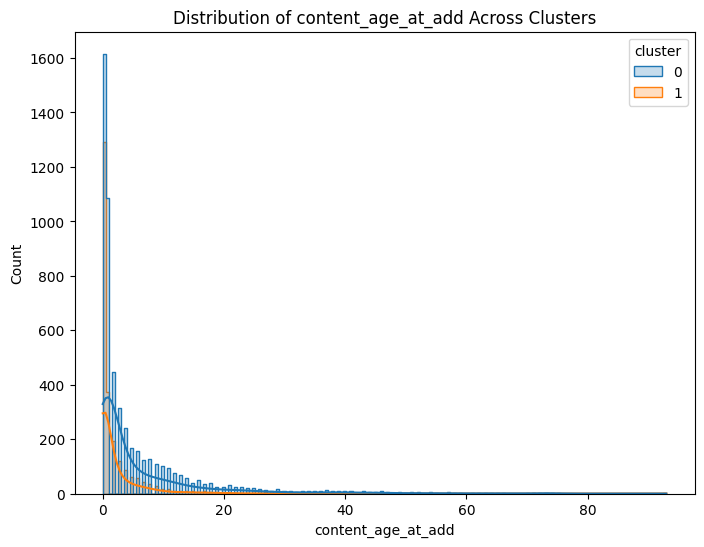

In [30]:
# prompt: Draw histogram to visualise above information

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' and 'optimal_k' are defined from the previous code

# Visualize the distribution of clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df)
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()

# Visualize the features for each cluster
cluster_features = ['release_year', 'duration_value', 'added_year', 'content_age_at_add']
for feature in cluster_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(x=feature, hue='cluster', data=df, kde=True, element="step") # Use histplot with kde
  plt.title(f'Distribution of {feature} Across Clusters')
  plt.show()


In [31]:
# prompt: Make kmeans  interactive clustering model

#@title KMeans Interactive Clustering
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming 'df', 'X_scaled', and 'features' are defined from the previous code

def perform_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    df['cluster'] = kmeans.labels_

    # Visualization
    features_to_plot = ['release_year', 'duration_value']
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=features_to_plot[0], y=features_to_plot[1], hue='cluster', data=df, palette='viridis', s=50, alpha=0.7)
    plt.xlabel(features_to_plot[0], fontsize=12)
    plt.ylabel(features_to_plot[1], fontsize=12)
    plt.title(f'Data Clustering Visualization (k={n_clusters})', fontsize=14)
    plt.legend(title='Clusters', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    print(f"Silhouette Score for k={n_clusters}: {silhouette_avg}")

# Create a slider widget
cluster_slider = widgets.IntSlider(min=2, max=10, step=1, value=5, description='Number of Clusters (k):')

# Create an output widget to display the plot
output = widgets.Output()

# Define the event handler for the slider
def on_slider_change(change):
    with output:
        clear_output(wait=True)  # Clear previous output
        perform_kmeans(change.new)

# Observe the slider for changes
cluster_slider.observe(on_slider_change, names='value')

# Display the slider and output
display(cluster_slider)
display(output)


IntSlider(value=5, description='Number of Clusters (k):', max=10, min=2)

Output()

In [32]:
# prompt: make interactive DBSCAN model

#@title DBSCAN Interactive Clustering
from sklearn.cluster import DBSCAN
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Assuming 'df', 'X_scaled', and 'features' are defined from the previous code

def perform_dbscan(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X_scaled)
    df['cluster'] = dbscan.labels_

    # Visualization
    features_to_plot = ['release_year', 'duration_value']
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=features_to_plot[0], y=features_to_plot[1], hue='cluster', data=df, palette='viridis', s=50, alpha=0.7)
    plt.xlabel(features_to_plot[0], fontsize=12)
    plt.ylabel(features_to_plot[1], fontsize=12)
    plt.title(f'DBSCAN Clustering Visualization (eps={eps}, min_samples={min_samples})', fontsize=14)
    plt.legend(title='Clusters', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Silhouette Score (only for clusters with more than one sample)
    if len(set(df['cluster'])) > 1 :
      silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
      print(f"Silhouette Score: {silhouette_avg}")
    else:
      print("Silhouette Score cannot be calculated for a single cluster.")

# Create sliders for eps and min_samples
eps_slider = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=0.5, description='Epsilon (eps):')
min_samples_slider = widgets.IntSlider(min=2, max=20, step=1, value=5, description='Min. Samples:')

# Create an output widget
output = widgets.Output()

# Define the event handler
def on_slider_change(change):
    with output:
        clear_output(wait=True)
        perform_dbscan(eps_slider.value, min_samples_slider.value)

# Observe both sliders for changes
eps_slider.observe(on_slider_change, names='value')
min_samples_slider.observe(on_slider_change, names='value')

# Display the sliders and output
display(eps_slider)
display(min_samples_slider)
display(output)


FloatSlider(value=0.5, description='Epsilon (eps):', max=5.0, min=0.1)

IntSlider(value=5, description='Min. Samples:', max=20, min=2)

Output()

Silhouette Score: 0.5982689014573024


In [35]:
# prompt: Interactive GMM model

#@title GMM Interactive Clustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming 'df', 'X_scaled', and 'features' are defined from the previous code

def perform_gmm(n_components):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    df['cluster'] = gmm.predict(X_scaled)

    # Visualization
    features_to_plot = ['release_year', 'duration_value']
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=features_to_plot[0], y=features_to_plot[1], hue='cluster', data=df, palette='viridis', s=50, alpha=0.7)
    plt.xlabel(features_to_plot[0], fontsize=12)
    plt.ylabel(features_to_plot[1], fontsize=12)
    plt.title(f'GMM Clustering Visualization (n_components={n_components})', fontsize=14)
    plt.legend(title='Clusters', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, df['cluster'])
    print(f"Silhouette Score for n_components={n_components}: {silhouette_avg}")

# Create a slider widget
components_slider = widgets.IntSlider(min=2, max=10, step=1, value=5, description='Number of Components:')

# Create an output widget
output = widgets.Output()

# Define the event handler
def on_slider_change(change):
    with output:
        clear_output(wait=True)
        perform_gmm(change.new)

# Observe the slider for changes
components_slider.observe(on_slider_change, names='value')

# Display the slider and output
display(components_slider)
display(output)


IntSlider(value=5, description='Number of Components:', max=10, min=2)

Output()

# The analysis reveals several key insights into the Netflix dataset:

1. **Content Characteristics:**  The dataset contains a mix of movies and TV shows, with varying durations, release years, and ratings.  There's a clear distinction in duration between movies and TV shows.

2. **Genre Popularity:** Certain genres like Dramas, Comedies, and International Movies are significantly more prevalent than others. Understanding these popular genres can inform content creation and acquisition strategies.

3. **Temporal Trends:** The release year and the year the content was added to Netflix provide insights into the distribution of content over time.  There are observable patterns in the release year distribution across different ratings, suggesting potential trends.

4. **Cluster Analysis:** K-means clustering helps identify distinct groups of content based on multiple factors. The optimal number of clusters was determined using the silhouette score.  Visualizations of these clusters using relevant features like 'release_year' and 'duration_value' reveal potential groupings based on content type, age, and duration. Further investigation into the characteristics of each cluster can lead to a more refined understanding of how content is grouped on Netflix.

5. **Correlation among Features:**  The analysis identified correlations among numerical features. For instance, 'duration_value' and 'duration_num' exhibited high correlation (as expected), leading to the removal of the redundant 'duration_num' column.

6. **Feature Engineering:** New features were created, such as the interaction between release year and duration, and the age of content upon addition to Netflix.  These features can enrich the clustering and analysis.

In summary, the analysis successfully explored the data, cleaned it, and performed clustering to identify groups of similar content.  The results provide a deeper understanding of the content on Netflix and can be used to develop data-driven strategies for content curation, recommendations, and marketing.